# LINEAR REGRESSION

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Training and testing the Model](#section4)<br>
    - 4.1 [Splitting data into training and test datasets](#section401)<br>
    - 4.2 [Linear regression in scikit-learn](#section402)<br>
    - 4.3 [Interpreting Model Coefficients](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
    
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>
    - 5.2 [Model Evaluation using Rsquared value.](#section502)<br>
6. [Standardisation of data](#section6)<br>
7. [Feature Selection](#section7)<br>
8. [Handling Categorical Features](#section8)<br>

<a id=section1></a>

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

__Importing Packages__

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)


In [4]:
data.shape

(200, 4)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='sales', ylabel='Density'>

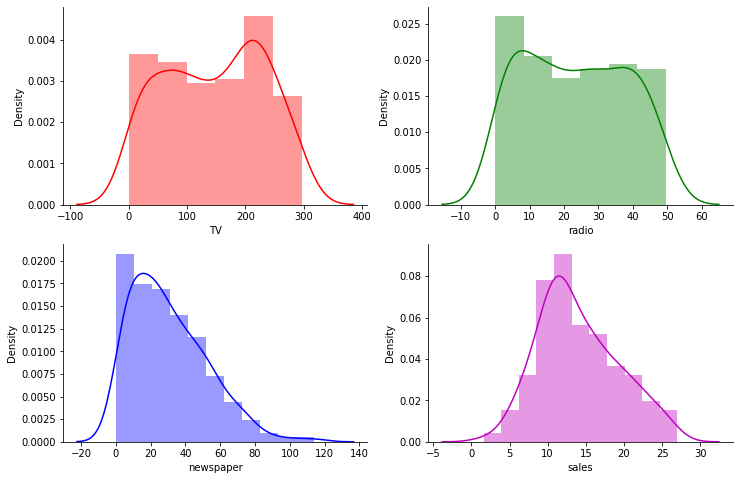

In [8]:
f, axes = plt.subplots(2,2,figsize=(12,8))
sns.despine(left=False)
sns.distplot(data.TV,color='r',ax=axes[0,0],kde=True)
sns.distplot(data.radio,color='g',ax=axes[0,1],kde=True)
sns.distplot(data.newspaper,color='b',ax=axes[1,0],kde=True)
sns.distplot(data.sales,color='m',ax=axes[1,1],kde=True)

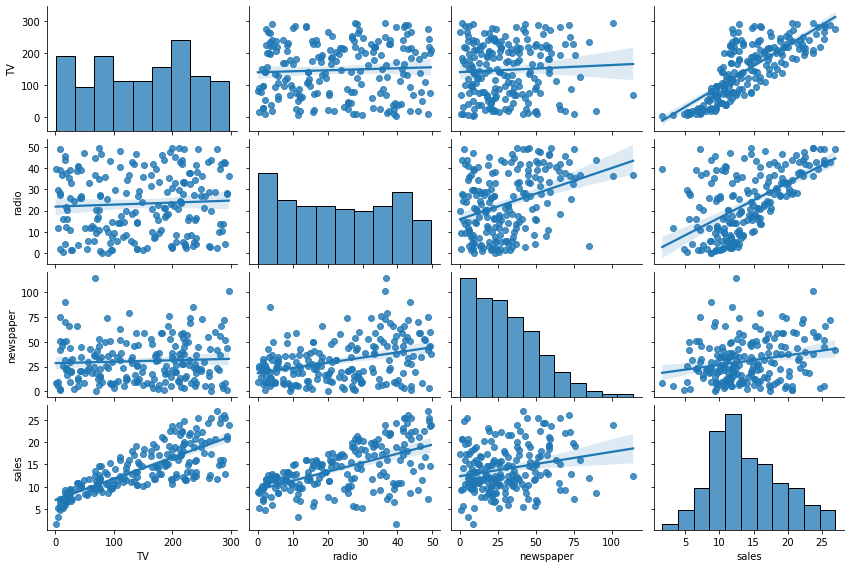

In [9]:
sns.pairplot(data,height=2,aspect=1.5,kind='reg')

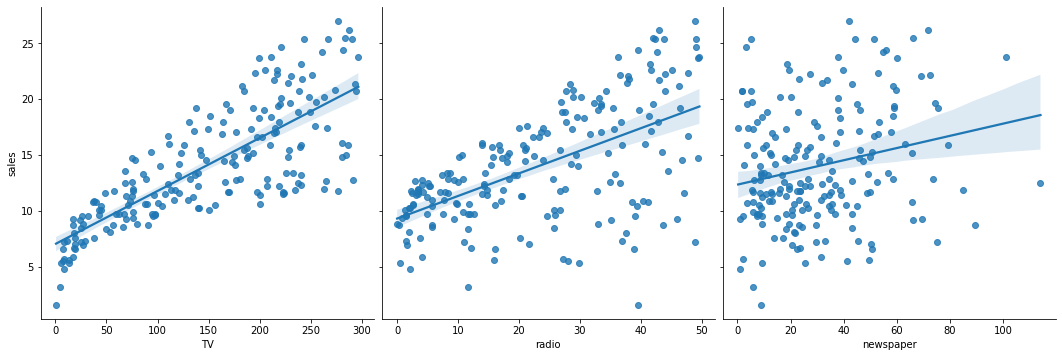

In [10]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars=['sales'],kind='reg',aspect=1,size=5)

<AxesSubplot:>

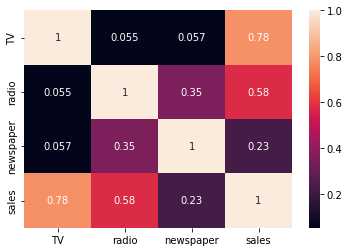

In [11]:
sns.heatmap(data.corr(),annot=True)

<a id=section4></a>

# 4. Training and testing the Model

In [12]:
features = ['TV','radio','newspaper']
target = ['sales']

In [13]:
data[features]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [14]:
data[target]

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(data[features],data[target],test_size=0.2,random_state=0)

In [16]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160, 1)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40, 1)


<a id=section402></a>

### 4.2 Liner regression in scikit-learn

In [17]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

In [18]:
%time
lr_model.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns


LinearRegression()

In [19]:
print('Intersept : ',lr_model.intercept_)
print('Coeffiescents : ',lr_model.coef_)

Intersept :  [2.99489303]
Coeffiescents :  [[ 0.04458402  0.19649703 -0.00278146]]


In [20]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [21]:
pd.DataFrame((lr_model.coef_).T,index=[X_train.columns],columns=['Co-efficents'])

,Co-efficents
TV,0.044584
radio,0.196497
newspaper,-0.002781


### Y = 2.9 + 0.044(TV) + 0.196(radio) - 0.0027(newspaper)

In [22]:
y_train_predictions = lr_model.predict(X_train)

In [23]:
y_train_predictions[0:5]

array([[12.04236485],
       [ 9.22699748],
       [15.08826616],
       [16.35778089],
       [17.07540865]])

In [24]:
y_test_predictions = lr_model.predict(X_test)

<a id=section5></a>

## 5. Model Evaluation :

In [25]:
from sklearn import metrics

In [26]:
MAE_Train = metrics.mean_absolute_error(y_train,y_train_predictions)
MAE_test = metrics.mean_absolute_error(y_test,y_test_predictions)

In [27]:
MAE_test

1.3617813502090272

In [28]:
MAE_Train

1.2131871622729427

In [29]:
data['sales'].mean()

14.0225

In [30]:
MAE_Train/data['sales'].mean()

0.0865171804081257

In [31]:
MAE_test/data['sales'].mean()

0.09711402033938507

In [32]:
metrics.mean_squared_error(y_train,y_train_predictions)

2.406814755818906

In [33]:
metrics.mean_squared_error(y_test,y_test_predictions)

4.40211829144968

In [34]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_predictions))

1.5513912323520802

In [35]:
np.sqrt(metrics.mean_squared_error(y_test,y_test_predictions))

2.098122563495679

In [36]:
len(data)

200

### Categorical Analysis

In [52]:
np.random.seed(123456)
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                     # assign roughly one third of observations to each group
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'

data.head()

,TV,radio,newspaper,sales,Area
1,230.1,37.8,69.2,22.1,rural
2,44.5,39.3,45.1,10.4,urban
3,17.2,45.9,69.3,9.3,rural
4,151.5,41.3,58.5,18.5,urban
5,180.8,10.8,58.4,12.9,suburban


In [53]:
data['Area'].value_counts()

suburban    78
urban       63
rural       59
Name: Area, dtype: int64

<AxesSubplot:xlabel='Area'>

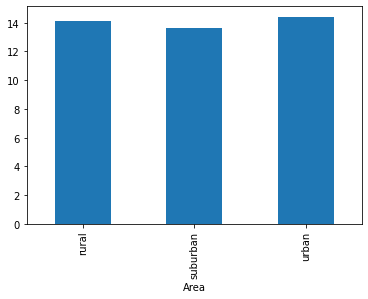

In [54]:
data.groupby(['Area'])['sales'].mean().plot(kind='bar')

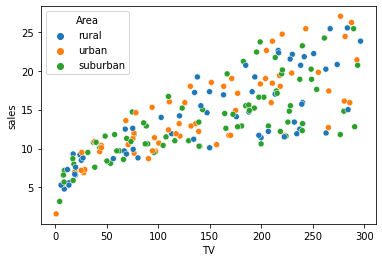

In [55]:
a = sns.scatterplot(x="TV", y="sales", data=data, hue='Area')

In [62]:
data_dummy = pd.get_dummies(data,columns=['Area'],drop_first=True)

In [63]:
data_dummy.head()

,TV,radio,newspaper,sales,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,0,0
2,44.5,39.3,45.1,10.4,0,1
3,17.2,45.9,69.3,9.3,0,0
4,151.5,41.3,58.5,18.5,0,1
5,180.8,10.8,58.4,12.9,1,0


In [64]:
data_dummy.columns

Index(['TV', 'radio', 'newspaper', 'sales', 'Area_suburban', 'Area_urban'], dtype='object')

In [69]:
features = ['TV', 'radio', 'newspaper','Area_suburban', 'Area_urban']

In [70]:
features

['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']

In [73]:
target = data.columns[3]

In [74]:
target

'sales'

<AxesSubplot:>

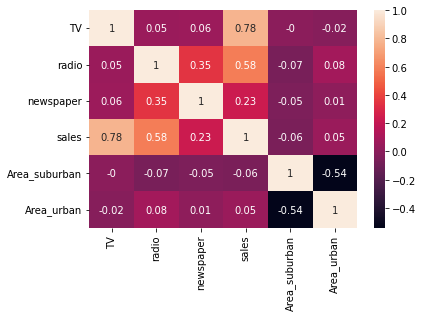

In [77]:
sns.heatmap(round(data_dummy.corr(),2),annot=True)

In [80]:
X = data_dummy[features]
y = data_dummy.sales
cat_lr_model = LinearRegression()
cat_lr_model.fit(X,y)

LinearRegression()

In [81]:
cat_y_pred = cat_lr_model.predict(X)

In [85]:
X.columns

Index(['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban'], dtype='object')

In [89]:
pd.DataFrame((cat_lr_model.coef_).T,index=X.columns,columns=['Coiefficents']).sort_values('Coiefficents',ascending=False)

,Coiefficents
Area_urban,0.253522
radio,0.187617
TV,0.045802
newspaper,-0.001018
Area_suburban,-0.117890


In [90]:
cat_lr_model.intercept_

2.920124220674438

In [91]:
data_dummy['Predictions'] = cat_y_pred

In [92]:
data_dummy.head()

,TV,radio,newspaper,sales,Area_suburban,Area_urban,Predictions
1,230.1,37.8,69.2,22.1,0,0,20.480693
2,44.5,39.3,45.1,10.4,0,1,12.539271
3,17.2,45.9,69.3,9.3,0,0,12.248978
4,151.5,41.3,58.5,18.5,0,1,17.801707
5,180.8,10.8,58.4,12.9,1,0,13.050091


In [93]:
data_dummy['Error'] = data_dummy['sales'] - data_dummy['Predictions']

In [94]:
data_dummy.head()

,TV,radio,newspaper,sales,Area_suburban,Area_urban,Predictions,Error
1,230.1,37.8,69.2,22.1,0,0,20.480693,1.619307
2,44.5,39.3,45.1,10.4,0,1,12.539271,-2.139271
3,17.2,45.9,69.3,9.3,0,0,12.248978,-2.948978
4,151.5,41.3,58.5,18.5,0,1,17.801707,0.698293
5,180.8,10.8,58.4,12.9,1,0,13.050091,-0.150091


In [95]:
data_dummy['Error'].describe()

count    2.000000e+02
mean    -8.260059e-16
std      1.665431e+00
min     -9.026476e+00
25%     -8.598808e-01
50%      2.789279e-01
75%      1.176990e+00
max      2.592033e+00
Name: Error, dtype: float64

<AxesSubplot:xlabel='Error', ylabel='Density'>

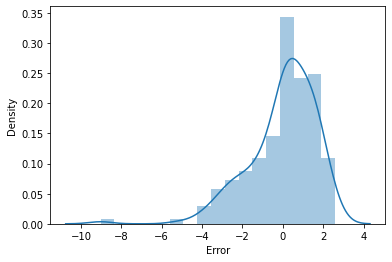

In [96]:
sns.distplot(data_dummy['Error'])

<AxesSubplot:title={'center':'Error_dist'}, xlabel='sales', ylabel='Error'>

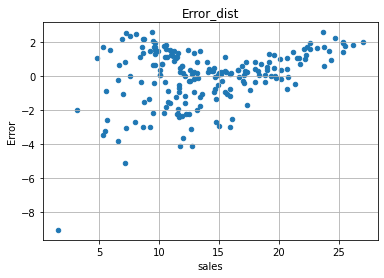

In [97]:
data_dummy.plot.scatter(x='sales',y='Error',grid=True,title='Error_dist')

<AxesSubplot:title={'center':'Actual Vs Predictions'}, xlabel='sales', ylabel='Predictions'>

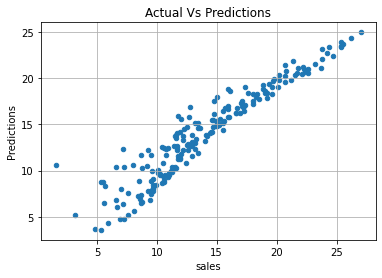

In [98]:
data_dummy.plot.scatter(x='sales',y='Predictions',grid=True,title='Actual Vs Predictions')